## Regularization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv("Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop("sales", axis=1)
y = df.sales

### Polynomial Conversion

In [10]:
polynomial_converter = PolynomialFeatures(degree=5,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

### Train | Test

In [11]:

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Scaling The Data

In [13]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [14]:
scaler =  StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [12]:
X_test = scaler.transform(X_test)

In [13]:
X_test

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [14]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
pd.DataFrame(X_test).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


### Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lm.predict(X_test)

In [29]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [30]:
y_train_pred = lm.predict(X_train)

In [31]:
eval_metrics(y_train, y_train_pred)

r2_score: 0.9976072485267145 
 mae: 0.18621293136504957 
 mse: 0.06296801889161928 
 rmse: 0.25093429198022993


In [32]:
eval_metrics(y_test, y_pred)

r2_score: 0.7649897681643356 
 mae: 0.6659594307588336 
 mse: 6.634847380750249 
 rmse: 2.5758197492740535


In [33]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,0.250934,2.575820
mae,0.186213,0.665959
mse,0.062968,6.634847
R2,0.997607,0.764990


In [34]:
pd.DataFrame(poly_features).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

In [41]:
pd.DataFrame(poly_features).corr() > 0.95

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
pd.DataFrame(poly_features).corr().style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

### Cross Validate

In [35]:
from sklearn.model_selection import cross_validate, cross_val_score

In [36]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [37]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.002137,0.000865,-0.280734,-1.994430,-31.328119,-5.597153
1,0.001506,0.001003,0.993019,-0.377066,-0.250648,-0.500647
2,0.001001,0.001001,0.983934,-0.392312,-0.306241,-0.553391
3,0.002003,0.000000,0.825272,-0.979767,-4.402358,-2.098180
4,0.002000,0.000000,0.991181,-0.322253,-0.166869,-0.408496
5,0.002002,0.001001,0.969012,-0.484493,-0.976815,-0.988339
6,0.001001,0.001002,0.992885,-0.327955,-0.144808,-0.380536
7,0.002002,0.000000,0.990130,-0.447015,-0.332058,-0.576244
8,0.002001,0.000000,0.965508,-0.465024,-0.528863,-0.727230
9,0.001001,0.001000,0.990123,-0.324433,-0.197801,-0.444748


In [39]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.mean()

fit_time                            0.001665
score_time                          0.000587
test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

In [40]:
eval_metrics(y_test, y_pred)

r2_score: 0.7649897681643356 
 mae: 0.6659594307588336 
 mse: 6.634847380750249 
 rmse: 2.5758197492740535


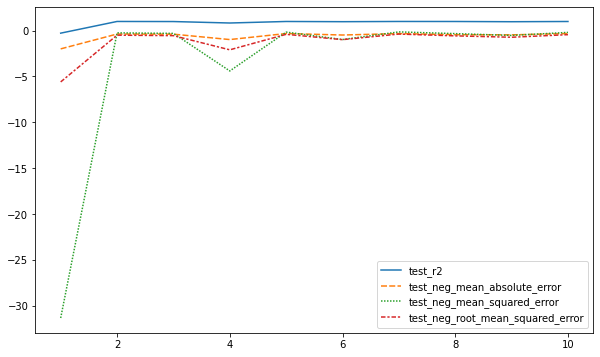

In [41]:
sns.lineplot(data = scores.iloc[:,2:]);

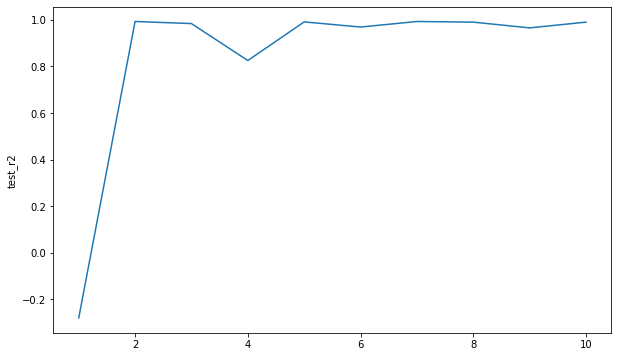

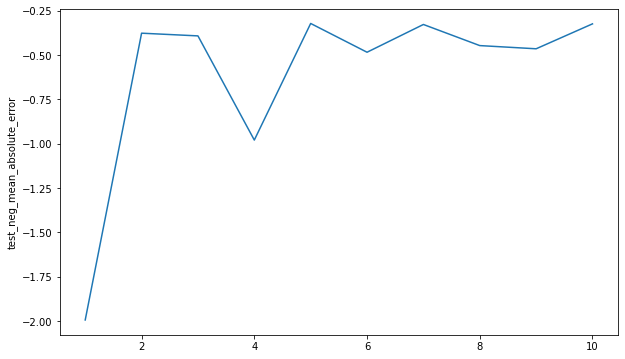

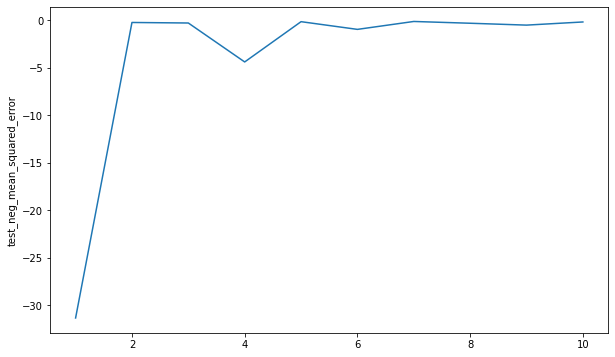

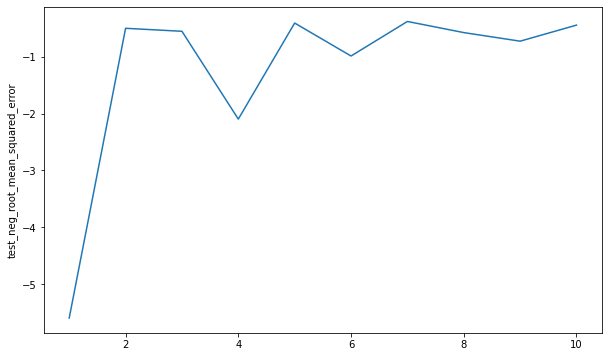

In [42]:
for i in scores.iloc[:, 2:].columns:
    plt.figure(i)
    sns.lineplot(data = scores.iloc[:,2:][i])

In [43]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [44]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"]) # ????
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


### Ridge Regression

In [45]:
from sklearn.linear_model import Ridge

In [46]:
ridge_model = Ridge(alpha=1)

In [47]:
ridge_model.fit(X_train, y_train) # We transform before

Ridge(alpha=1)

In [48]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9825113234815029 
 mae: 0.4824462638733427 
 mse: 0.49374318166997105 
 rmse: 0.7026686144050914


In [49]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

r2_score: 0.9886773159501695 
 mae: 0.33814926534101447 
 mse: 0.2979695096267431 
 rmse: 0.5458658348227549


In [50]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,0.545866,0.702669
mae,0.338149,0.482446
mse,0.297970,0.493743
R2,0.988677,0.982511


In [51]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,0.250934,2.575820,0.545866,0.702669
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
R2,0.997607,0.764990,0.988677,0.982511


### For Ridge Regression CV With Alpha : 1

In [52]:
model = Ridge(alpha=1)

In [53]:
scores = cross_validate(model, X_train, y_train,
                         scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [54]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.989194,-0.430312,-0.264330,-0.514130
2,0.988294,-0.399467,-0.420281,-0.648291
3,0.980399,-0.419370,-0.373627,-0.611250
4,0.965854,-0.656779,-0.860334,-0.927542
5,0.991450,-0.343240,-0.161785,-0.402224
6,0.919753,-0.723583,-2.529543,-1.590454
7,0.993011,-0.290596,-0.142237,-0.377144
8,0.990300,-0.434471,-0.326317,-0.571241
9,0.975828,-0.443009,-0.370636,-0.608799
10,0.991642,-0.269488,-0.167392,-0.409136


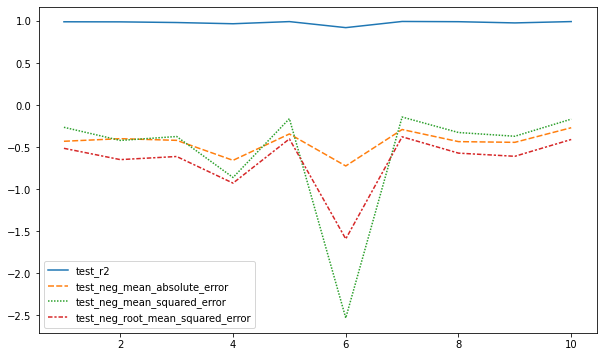

In [55]:
sns.lineplot(data = scores.iloc[:,2:]);

In [56]:
pd.DataFrame(scores, index=range(1,11)).iloc[:,2:].mean()

test_r2                             0.978573
test_neg_mean_absolute_error       -0.441032
test_neg_mean_squared_error        -0.561648
test_neg_root_mean_squared_error   -0.666021
dtype: float64

In [57]:
eval_metrics(y_test, y_pred)

r2_score: 0.9825113234815029 
 mae: 0.4824462638733427 
 mse: 0.49374318166997105 
 rmse: 0.7026686144050914


In [58]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [59]:
rm_df = pd.DataFrame(ridge_model.coef_, columns=["ridge_coef_"])

In [60]:
pd.concat([lm_df, rm_df], axis=1) 

,lm_coef,ridge_coef_
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


### Choosing Best Alpha Value With Cross_Validation

In [61]:
from sklearn.linear_model import RidgeCV

In [74]:
alpha_space = np.linspace(0.01, 10, 100)
alpha_space

array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.13818182,  3.23909091,  3.34      ,  3.44090909,
        3.54181818,  3.64272727,  3.74363636,  3.84454545,  3.94545455,
        4.04636364,  4.14727273,  4.24818182,  4.34909091,  4.45      ,
        4.55090909,  4.65181818,  4.75272727,  4.85363636,  4.95454545,
        5.05545455,  5.15636364,  5.25727273,  5.35818182,  5.45909091,
        5.56      ,  5.66090909,  5.76181818,  5.86272727,  5.96363636,
        6.06454545,  6.16545455,  6.26636364,  6.36727273,  6.46818182,
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97

In [75]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv=10, scoring="neg_root_mean_squared_error" ) # model and yellowbrick cv and scoring value must be same.

In [76]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [77]:
ridge_cv_model.alpha_

0.01

In [78]:
y_pred = ridge_cv_model.predict(X_test)

In [79]:
eval_metrics(y_test, y_pred)

r2_score: 0.9842560267411619 
 mae: 0.4295922763993867 
 mse: 0.4444864333058027 
 rmse: 0.6666981575689277


In [80]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

r2_score: 0.9950891427946879 
 mae: 0.2382876628642579 
 mse: 0.12923487989897017 
 rmse: 0.3594925310753621


In [81]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,0.359493,0.666698
mae,0.238288,0.429592
mse,0.129235,0.444486
R2,0.995089,0.984256


In [82]:
pd.concat([ls,rs,rcs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.359493,0.666698
mae,0.186213,0.665959,0.338149,0.482446,0.238288,0.429592
mse,0.062968,6.634847,0.297970,0.493743,0.129235,0.444486
R2,0.997607,0.764990,0.988677,0.982511,0.995089,0.984256


In [83]:
ridge_cv_model.coef_

array([  7.10425201,   0.59436024,   0.37947381, -10.19963885,
         4.22131509,  -0.87951021,  -0.24730004,   0.79894528,
        -0.67058926,   3.94071737,  -4.09519328,  -1.12423435,
         2.00834404,   0.06777196,   0.66529021,  -1.02470443,
         0.67815838,  -1.80871853,   1.69957963,   3.80104183,
         5.47426549,   1.83955144,  -4.19361352,   2.45396297,
         0.31163398,   2.11043225,  -1.63407989,  -0.51830554,
        -1.27460157,  -0.41719807,   0.75073064,  -1.37783756,
        -0.07508811,   0.7895968 ,  -2.88587757,  -2.48237556,
        -0.31199485,   4.03426927,  -3.19907402,   0.0377371 ,
        -4.54443058,   2.76578708,   0.47027806,  -0.39436769,
         2.28903133,  -1.2227771 ,  -0.2359633 ,   1.1381721 ,
         0.15765934,   0.15242193,  -0.62113946,   1.05244647,
         0.82625054,  -0.2620116 ,  -1.12902261])

In [84]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["Ridge_cv_coef_0.01"])

In [85]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1) # Note : Alpha değeri (ceza değeri) büyüdüğü için coeff_ değerleri sıfıra yaklaşıyor

,lm_coef,ridge_coef_,Ridge_cv_coef_0.01
0,13.942084,3.428822,7.104252
1,-3.147845,0.689086,0.594360
2,0.622117,0.170305,0.379474
3,-58.348614,-0.910850,-10.199639
4,17.227695,2.723077,4.221315
5,-3.875031,0.112909,-0.879510
6,14.688014,-0.404686,-0.247300
7,0.835494,0.287950,0.798945
8,-2.765824,-0.091937,-0.670589
9,115.503087,-1.014535,3.940717


### Choosing An Alpha Value With Yellowbrick

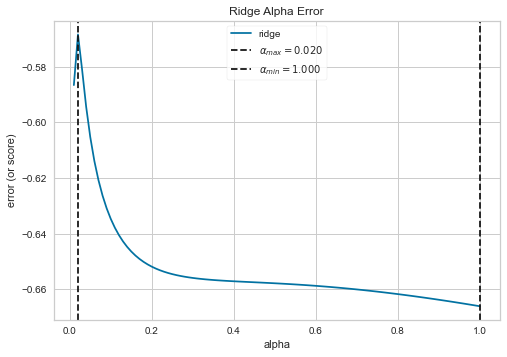

In [86]:
#let's find the same alpha with yellowbrick
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 1, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv = 10,
    scoring = "neg_root_mean_squared_error"
)
visualizer.fit(X_train, y_train)
visualizer.show();

### Lasso

In [87]:
from sklearn.linear_model import Lasso, LassoCV

In [88]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [89]:
y_train_pred = lasso_model.predict(X_train)

In [90]:
eval_metrics(y_train, y_train_pred)

r2_score: 0.919650453855065 
 mae: 1.0183549117463373 
 mse: 2.1144911187286946 
 rmse: 1.4541289897147


In [91]:
y_pred = lasso_model.predict(X_test)

In [92]:
eval_metrics(y_test, y_pred)

r2_score: 0.9185896601157192 
 mae: 1.0179586607877587 
 mse: 2.2983900578631644 
 rmse: 1.5160442136900771


In [93]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,1.454129,1.516044
mae,1.018355,1.017959
mse,2.114491,2.298390
R2,0.919650,0.918590


In [94]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,0.250934,2.575820,0.545866,0.702669,0.359493,0.666698,1.454129,1.516044
mae,0.186213,0.665959,0.338149,0.482446,0.238288,0.429592,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.129235,0.444486,2.114491,2.298390
R2,0.997607,0.764990,0.988677,0.982511,0.995089,0.984256,0.919650,0.918590


### For Lasso CV With Default Alpha : 1

In [95]:
model = Lasso()
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [96]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.955947,-0.888044,-1.077594,-1.038072
2,0.903583,-1.372171,-3.461746,-1.860577
3,0.968382,-0.565185,-0.602683,-0.776327
4,0.938413,-0.813635,-1.551711,-1.245677
5,0.943817,-0.847035,-1.063069,-1.031052
6,0.829658,-1.304584,-5.369549,-2.317229
7,0.955279,-0.689034,-0.910175,-0.954031
8,0.857451,-1.790809,-4.795721,-2.189913
9,0.920257,-0.901485,-1.222707,-1.105761
10,0.887138,-1.218712,-2.260339,-1.503442


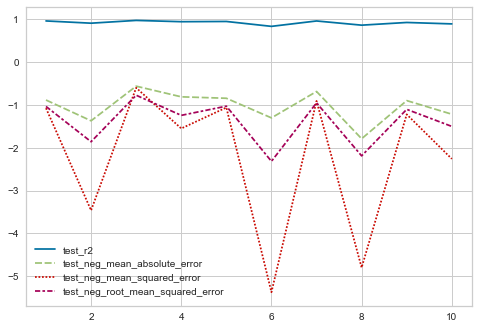

In [97]:
sns.lineplot(data = scores.iloc[:,2:]);

In [98]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.915992
test_neg_mean_absolute_error       -1.039070
test_neg_mean_squared_error        -2.231529
test_neg_root_mean_squared_error   -1.402208
dtype: float64

In [99]:
eval_metrics(y_test, y_pred)

r2_score: 0.9185896601157192 
 mae: 1.0179586607877587 
 mse: 2.2983900578631644 
 rmse: 1.5160442136900771


In [100]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [101]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [102]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_,Ridge_cv_coef_0.01,lasso_coef_1
0,13.942084,3.428822,7.104252,0.696016
1,-3.147845,0.689086,0.594360,0.000000
2,0.622117,0.170305,0.379474,0.000000
3,-58.348614,-0.910850,-10.199639,0.000000
4,17.227695,2.723077,4.221315,3.490946
5,-3.875031,0.112909,-0.879510,0.000000
6,14.688014,-0.404686,-0.247300,0.000000
7,0.835494,0.287950,0.798945,0.000000
8,-2.765824,-0.091937,-0.670589,0.000000
9,115.503087,-1.014535,3.940717,0.000000


### Choosing Best Alpha Value With Cross-Validation

In [103]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000)

In [105]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [106]:
lasso_cv_model.alpha_

0.01

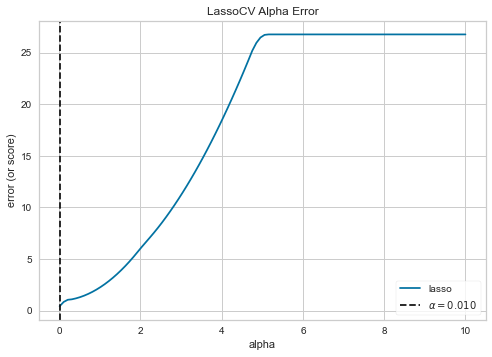

In [107]:
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 10, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show();

In [108]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

r2_score: 0.9888244250353099 
 mae: 0.33906533633271657 
 mse: 0.2940981641252691 
 rmse: 0.5423081818719584


In [109]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9862951034658218 
 mae: 0.440975200468038 
 mse: 0.3869188850331833 
 rmse: 0.6220280419990591


In [110]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,0.542308,0.622028
mae,0.339065,0.440975
mse,0.294098,0.386919
R2,0.988824,0.986295


In [111]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.359493,0.666698,1.454129,1.516044,0.542308,0.622028
mae,0.186213,0.665959,0.338149,0.482446,0.238288,0.429592,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.129235,0.444486,2.114491,2.298390,0.294098,0.386919
R2,0.997607,0.764990,0.988677,0.982511,0.995089,0.984256,0.919650,0.918590,0.988824,0.986295


In [112]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [113]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [114]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_,Ridge_cv_coef_0.01,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,7.104252,0.696016,4.270214
1,-3.147845,0.689086,0.594360,0.000000,0.180374
2,0.622117,0.170305,0.379474,0.000000,0.139659
3,-58.348614,-0.910850,-10.199639,0.000000,-3.146055
4,17.227695,2.723077,4.221315,3.490946,4.153400
5,-3.875031,0.112909,-0.879510,0.000000,-0.000000
6,14.688014,-0.404686,-0.247300,0.000000,0.000000
7,0.835494,0.287950,0.798945,0.000000,0.062497
8,-2.765824,-0.091937,-0.670589,0.000000,0.000000
9,115.503087,-1.014535,3.940717,0.000000,-0.000000


### Feature Importances With Ridge

In [115]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

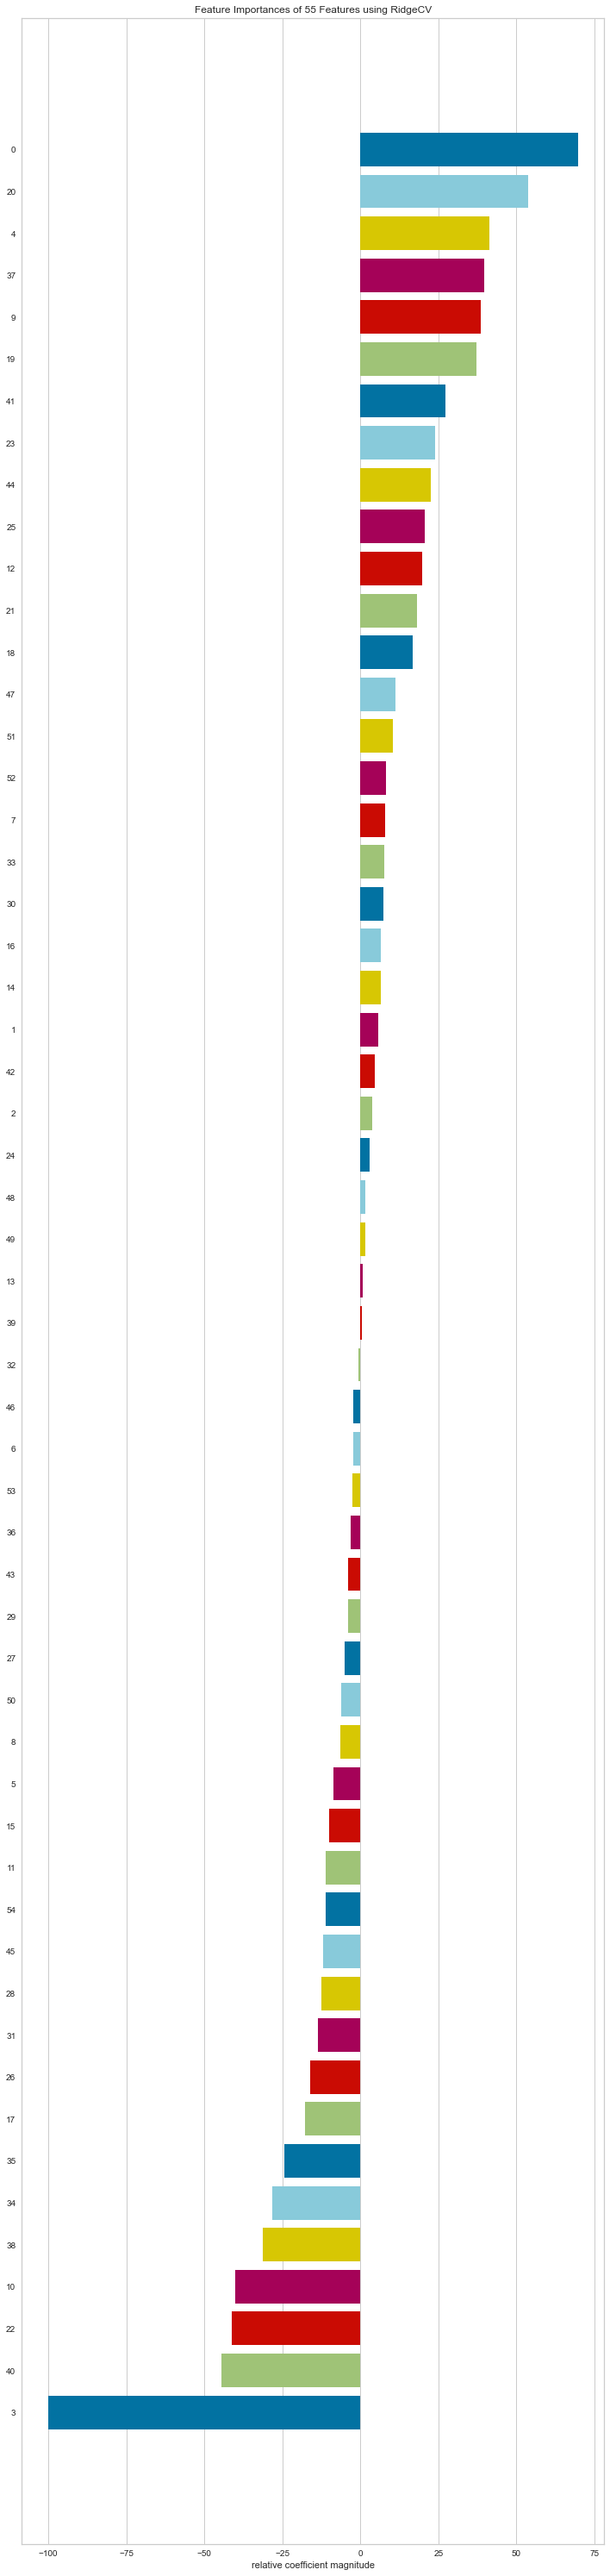

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [116]:
viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

### Feature Importances With Lasso

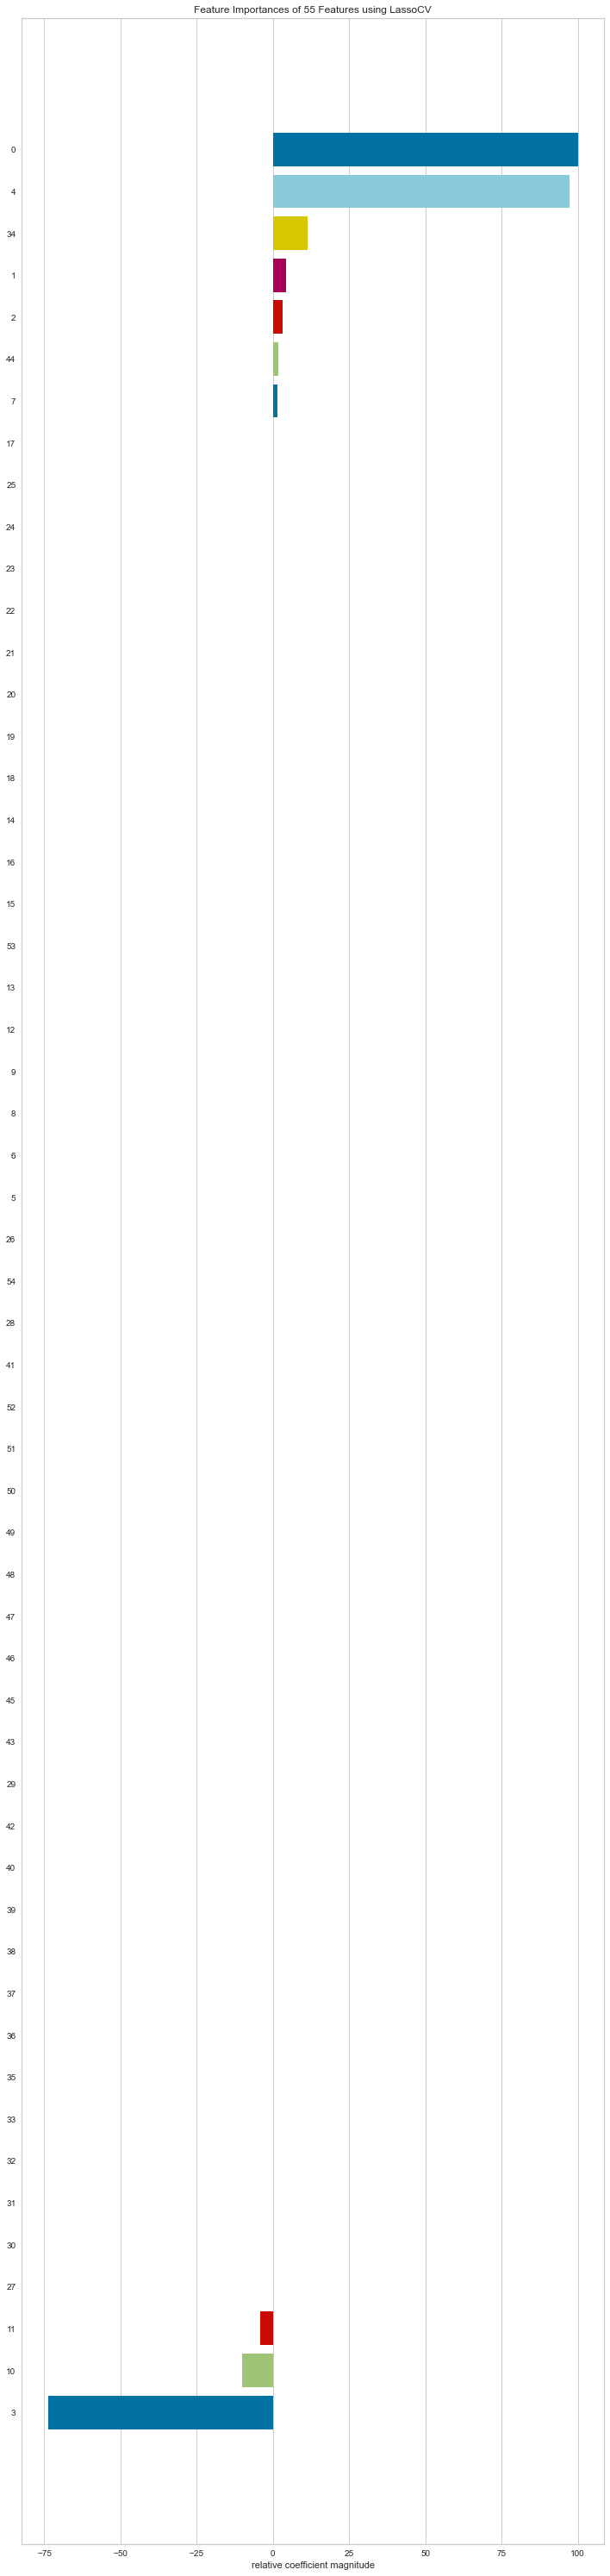

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [96]:
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

### Elastic Net

In [117]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [118]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)


ElasticNet()

In [119]:
elastic_model.l1_ratio

0.5

In [120]:
elastic_model.alpha

1.0

In [121]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

r2_score: 0.896125980369787 
 mae: 1.24848020328436 
 mse: 2.733564811661118 
 rmse: 1.6533495733392616


In [122]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9020164827239767 
 mae: 1.2006537964645352 
 mse: 2.766286718146463 
 rmse: 1.6632157761837347


In [123]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.653350,1.663216
mae,1.248480,1.200654
mse,2.733565,2.766287
R2,0.896126,0.902016


In [124]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,0.250934,2.575820,0.545866,0.702669,0.359493,0.666698,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216
mae,0.186213,0.665959,0.338149,0.482446,0.238288,0.429592,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.129235,0.444486,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
R2,0.997607,0.764990,0.988677,0.982511,0.995089,0.984256,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016


In [125]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [126]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [127]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_,Ridge_cv_coef_0.01,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,69.651996,0.696016,4.270214,0.862936
1,-3.147845,0.689086,5.827268,0.000000,0.180374,0.211443
2,0.622117,0.170305,3.720463,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-100.000000,0.000000,-3.146055,0.290767
4,17.227695,2.723077,41.386907,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-8.622954,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-2.424596,0.000000,0.000000,0.000000
7,0.835494,0.287950,7.833074,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-6.574637,0.000000,0.000000,0.000000
9,115.503087,-1.014535,38.635852,0.000000,-0.000000,0.000000


In [128]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [129]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [130]:
elastic_cv_model.alpha_

0.01

In [131]:
elastic_cv_model.l1_ratio_

1.0

In [132]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [133]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [134]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_,Ridge_cv_coef_0.01,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,69.651996,0.696016,4.270214,0.862936,4.270214
1,-3.147845,0.689086,5.827268,0.000000,0.180374,0.211443,0.180374
2,0.622117,0.170305,3.720463,0.000000,0.139659,0.000000,0.139659
3,-58.348614,-0.910850,-100.000000,0.000000,-3.146055,0.290767,-3.146055
4,17.227695,2.723077,41.386907,3.490946,4.153400,0.980991,4.153400
5,-3.875031,0.112909,-8.622954,0.000000,-0.000000,0.002498,-0.000000
6,14.688014,-0.404686,-2.424596,0.000000,0.000000,0.000000,0.000000
7,0.835494,0.287950,7.833074,0.000000,0.062497,0.000000,0.062497
8,-2.765824,-0.091937,-6.574637,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,38.635852,0.000000,-0.000000,0.000000,-0.000000


In [135]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

r2_score: 0.9888244250353099 
 mae: 0.33906533633271657 
 mse: 0.2940981641252691 
 rmse: 0.5423081818719584


In [136]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9862951034658218 
 mae: 0.440975200468038 
 mse: 0.3869188850331833 
 rmse: 0.6220280419990591


In [137]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,0.542308,0.622028
mae,0.339065,0.440975
mse,0.294098,0.386919
R2,0.988824,0.986295


In [138]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.359493,0.666698,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216,0.542308,0.622028
mae,0.186213,0.665959,0.338149,0.482446,0.238288,0.429592,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.129235,0.444486,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287,0.294098,0.386919
R2,0.997607,0.764990,0.988677,0.982511,0.995089,0.984256,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016,0.988824,0.986295


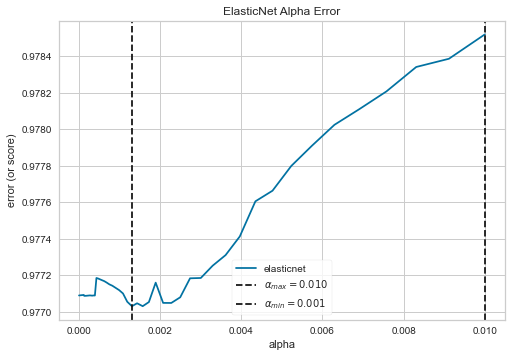

In [139]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from yellowbrick.regressor.alphas import manual_alphas


# Instantiate a model
model =  ElasticNet(tol = 0.01, max_iter=10000, l1_ratio = 1)

# Use the quick method and immediately show the figure
manual_alphas(model, X_train,y_train, cv=10);

### Grid Search

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
elastic_model = ElasticNet(tol = 0.01, max_iter=10000)

In [118]:
param_grid ={"alpha":[0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [119]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [120]:
grid_model.fit(X_train, y_train)

D ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, tol=0.01),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [121]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [122]:
pd.DataFrame(grid_model.cv_results_)

{'mean_fit_time': array([0.00110121, 0.00090075, 0.0008007 , 0.00080073, 0.0008009 ,
        0.00080078, 0.00070066, 0.00080078, 0.00100083, 0.0006005 ,
        0.00080073, 0.00050044, 0.00070057, 0.00090077, 0.00120122,
        0.00050039, 0.00080075, 0.00080073, 0.00070062, 0.00040038,
        0.00070059, 0.00080068, 0.00070059, 0.00070069, 0.00080056,
        0.00100095, 0.00050051, 0.00060041, 0.00090089, 0.00100079,
        0.00070057, 0.00070064, 0.00070071, 0.00020013, 0.0006006 ,
        0.00060053, 0.00070076, 0.0006005 , 0.00060046, 0.00040038,
        0.00060053, 0.00040035, 0.00050056, 0.00090082, 0.        ,
        0.00050044, 0.00050051, 0.00080051, 0.00040042, 0.00050039,
        0.00100098, 0.00040038, 0.00010004, 0.00050044, 0.0004004 ,
        0.00090075]),
 'std_fit_time': array([3.00344313e-04, 3.00249861e-04, 4.00352691e-04, 4.00364519e-04,
        4.00448158e-04, 4.00388708e-04, 4.58692634e-04, 4.00388297e-04,
        4.23822137e-07, 4.90310217e-04, 4.00364434e-0

In [125]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001101,3.003443e-04,0.000300,0.000459,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.616727,-0.720457,-0.585934,-0.677711,-0.466305,-1.785941,-0.386594,-0.568616,-0.604771,-0.464067,-0.687712,0.378609,11
1,0.000901,3.002499e-04,0.000300,0.000459,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.678853,-0.780662,-0.569113,-0.574002,-0.476698,-1.770841,-0.411215,-0.535465,-0.592014,-0.534330,-0.692319,0.372225,12
2,0.000801,4.003527e-04,0.000100,0.000300,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.678060,-0.749517,-0.551032,-0.550841,-0.461558,-1.759485,-0.410093,-0.518222,-0.588959,-0.518496,-0.678626,0.372093,9
3,0.000801,4.003645e-04,0.000100,0.000300,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.671731,-0.725301,-0.538630,-0.542335,-0.452623,-1.742214,-0.403505,-0.505980,-0.595931,-0.502694,-0.668095,0.369442,4
4,0.000801,4.004482e-04,0.000300,0.000459,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.671527,-0.719870,-0.528741,-0.540120,-0.449354,-1.739713,-0.403035,-0.501764,-0.595147,-0.495727,-0.664500,0.369801,3
5,0.000801,4.003887e-04,0.000100,0.000300,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.669691,-0.711933,-0.525804,-0.536906,-0.444850,-1.737410,-0.402206,-0.499164,-0.593874,-0.494558,-0.661640,0.369743,2
6,0.000701,4.586926e-04,0.000300,0.000459,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.669684,-0.710920,-0.521646,-0.536156,-0.444455,-1.736887,-0.402035,-0.497376,-0.594810,-0.494406,-0.660837,0.369860,1
7,0.000801,4.003883e-04,0.000200,0.000400,0.02,0.1,"{'alpha': 0.02, 'l1_ratio': 0.1}",-0.653623,-0.775079,-0.566694,-0.645186,-0.437245,-1.806226,-0.397164,-0.661691,-0.566938,-0.547486,-0.705733,0.381465,14
8,0.001001,4.238221e-07,0.000200,0.000400,0.02,0.5,"{'alpha': 0.02, 'l1_ratio': 0.5}",-0.700349,-0.769470,-0.531243,-0.584599,-0.437581,-1.780799,-0.421723,-0.593093,-0.573877,-0.563137,-0.695587,0.375090,13
9,0.000601,4.903102e-04,0.000200,0.000400,0.02,0.7,"{'alpha': 0.02, 'l1_ratio': 0.7}",-0.691412,-0.734408,-0.497825,-0.577165,-0.425011,-1.785290,-0.425517,-0.584410,-0.588482,-0.552947,-0.686247,0.378360,10


In [ ]:
## new_model = ElasticNet(alpha=0.01, l1_ratio=1) is same GridSearh

### Using Best Model From GridSearch

In [127]:
y_pred = grid_model.predict(X_test)

In [128]:
eval_metrics(y_test, y_pred)

r2_score: 0.9800943393901784 
 mae: 0.536538281742294 
 mse: 0.5619798726530828 
 rmse: 0.7496531682405423
